# ICA in Thunder

      Data Gathered: 01.29.15           
      Analyzed: 01.02.16
      Gathered By: WALIII & DPL
      
Analysis of calcium imaging data in Thunder, some visualizations in Lightning


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
from thunder import Colorize
image = Colorize.image

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%matplotlib inline

In [3]:
import os.path as pth
imagepath = pth.join(pth.dirname(pth.realpath(thunder.__file__)), '/Users/ARGO/Dropbox/Jupyter/Song_lowSNR.tif')

In [4]:
data = tsc.loadImages(imagepath, inputFormat='tif-stack', nplanes = 1)

In [5]:
data.cache()
data.count();

In [6]:
# Resize images to fit screen....
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  

Lets look at the mean, std and Max projection images, and we will overlay these with our ROI masks



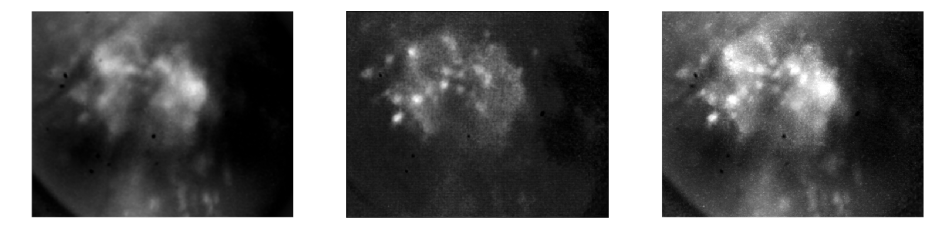

In [7]:
# look at the mean, std and Max projection images, and we will overlay these with our ROI masks

im = data.mean()

ax1 = plt.subplot(131)
im = data.mean()
image(im[:], ax=plt.gca())
plt.subplot(132)
img = data.stdev()
image(img[:], ax=plt.gca())
plt.subplot(133)
img = data.max()
image(img[:], ax=plt.gca())

In [8]:
ts = data.toTimeSeries()

In [36]:
from thunder import ICA
model_ICA = ICA(k=20,c=6).fit(ts)

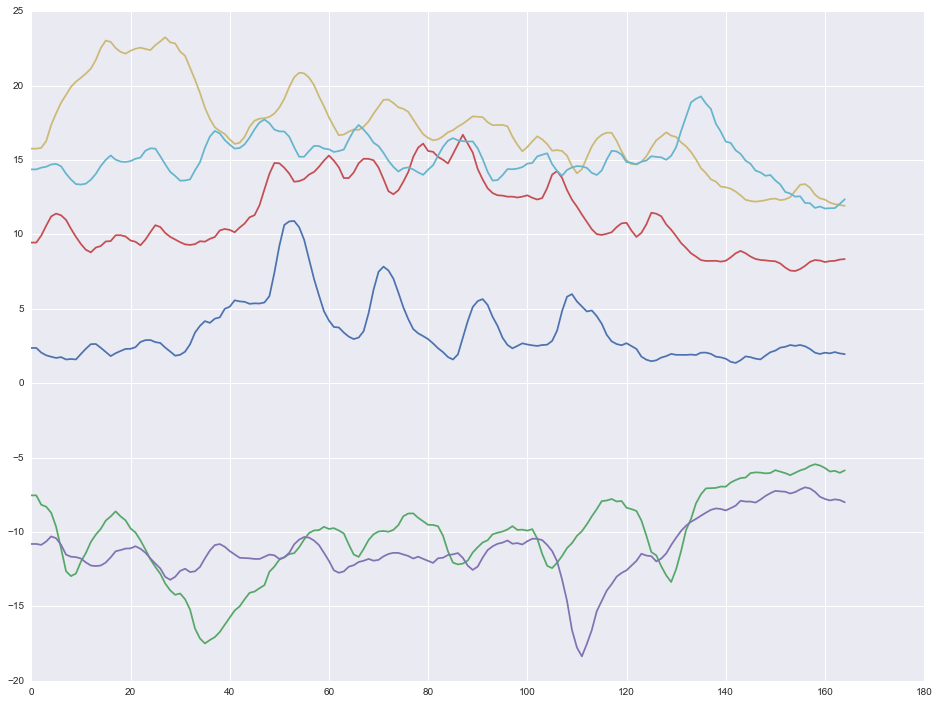

In [38]:
sns.set_style('darkgrid')
plt.plot(model_ICA.a);

In [40]:
imgs = model_ICA.sigs.pack()

In [47]:
imgs2 = imgs[0:3,:,:] # first 3
imgs3 = imgs[1:4,:,:]  # Last 3
imgs4 = imgs[2:5,:,:]  # Last 3
imgs5 = imgs[3:6,:,:]  # Last 3
imgs4.shape

(3, 560, 710)

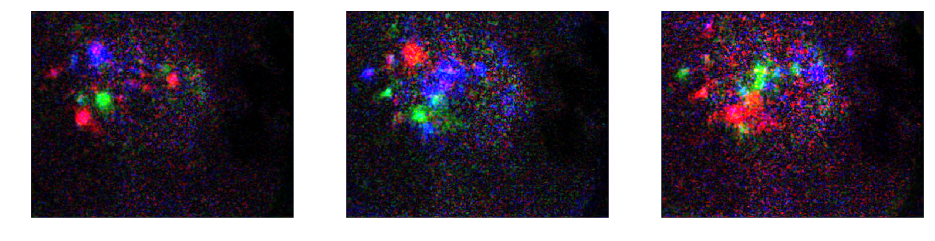

In [51]:


ax1 = plt.subplot(131)
maps = Colorize(cmap='indexed', colors=['red','green','blue'], scale=4).transform(abs(imgs2))
image(maps[:,:],ax=plt.gca())

ax1 = plt.subplot(132)
maps = Colorize(cmap='indexed', colors=['red','green','blue'], scale=4).transform(abs(imgs3))
image(maps[:,:],ax=plt.gca())

ax1 = plt.subplot(133)
maps = Colorize(cmap='indexed', colors=['red','green','blue'], scale=4).transform(abs(imgs4))
image(maps[:,:],ax=plt.gca())



# NMF
Non-negative matrix factorization is an alternative decomposition. It is meant to be applied to data that are strictly positive, which is often approximately true of neural responses. Like PCA, it also returns a set of temporal and spatial basis functions, but unlike PCA, it tends to return basis functions that do not mix responses from different regions together. We can run NMF on the same data and look at the basis functions it recovers.

In [9]:
from thunder import NMF
model = NMF(k=3, maxIter=20).fit(ts)

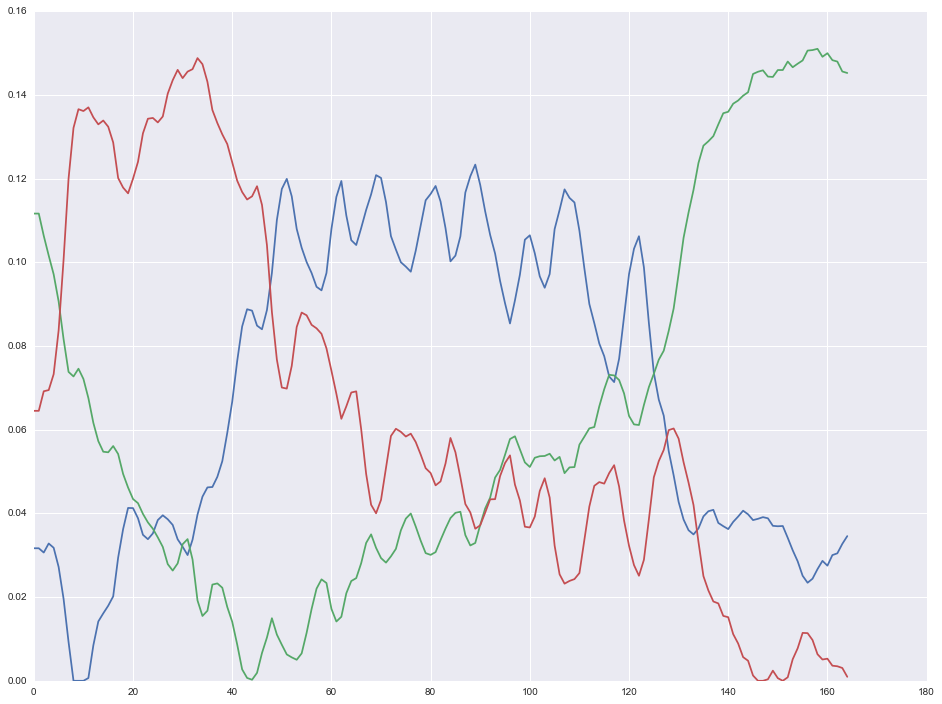

In [10]:
plt.plot(model.h.T);

In [11]:
imgs = model.w.pack()

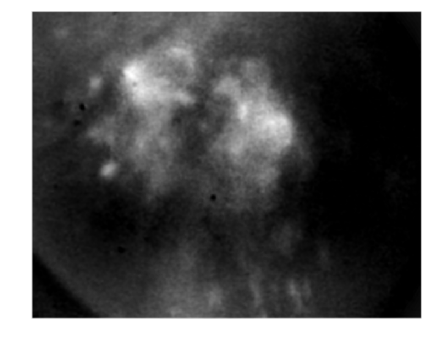

In [16]:
image(imgs[0][:,:])

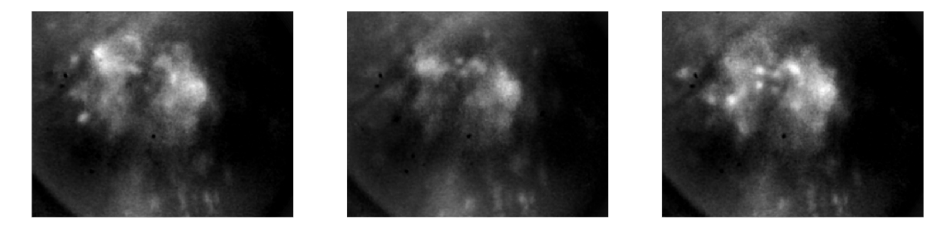

In [22]:
im = data.mean()

ax1 = plt.subplot(131)
image(imgs[0][:,:], ax=plt.gca())

ax1 = plt.subplot(132)
image(imgs[1][:,:], ax=plt.gca())

ax1 = plt.subplot(133)
image(imgs[2][:,:], ax=plt.gca())



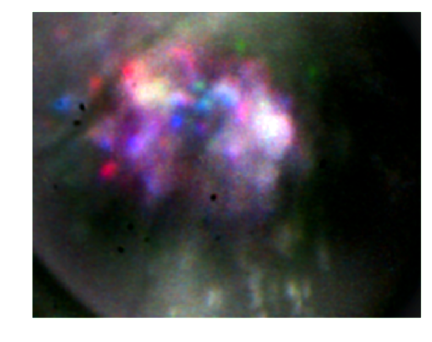

In [26]:
maps = Colorize(cmap='rgb', scale=1.3).transform(imgs)
image(maps[:,:])

One problem with this way to look at NMF components is that the scale of the different components can cause some to dominante others. We also might like more control over color assignments. The indexed colorization option lets you specify one color per channel, and automatically normalizes the amplitude of each one.

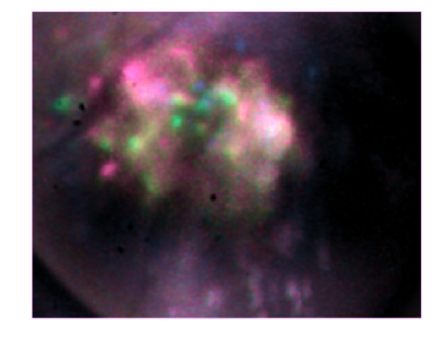

In [34]:
maps = Colorize(cmap='indexed', colors=[ "hotpink", "cornflowerblue", "mediumseagreen"], scale=1.3).transform(imgs)
image(maps[:,:])